# Выбор датасета


Мной были выбраны следующие наборы данных для исследования алгоритмов машинного обучения:

Классификация: Mushroom Dataset - содержит информацию о различных видах грибов, включая характеристики для определения их съедобности или ядовитости. Актуальность: В условиях возрождающегося интереса к естественным продуктам правильное распознавание съедобности грибов становится важной задачей. Этот датасет может стать основой для разработки систем классификации, обеспечивающих безопасность пользователей при сборе грибов в дикой природе.


Регрессия: Bike Sharing Dataset - набор данных для предсказания спроса на прокат велосипедов, учитывающий погодные условия, время и другие факторы. Актуальность: В условиях растущего интереса к устойчивым городским транспортным системам, понимание и прогнозирование спроса на услуги проката велосипедов критично. Это позволяет оптимизировать городскую транспортную сеть и способствует снижению заторов и защите окружающей среды.

# Выбор метрик

Метрикой для классификации будет выступать ROC AUC, которым будет удобно сравнивать два классификатора единым числом, учитывающим дисбаланс классов и все пороги для формирования положительного класса

Для задачи регрессии метрикой будет выступать MAE, которая будет иметь тот же масштаб, что и целевая переменная (удобство интерпретации), одинаково учитывать все ошибки, а также будет иметь низкую чувствительность к выбросам - всё это поможет оценить качество модели на предсказании цены поездки.

# EDA + Предобработка данных (mushrooms dataset)

In [134]:
# Загружаем данные
import pandas as pd

mushroom_data = pd.read_csv('./mushrooms.csv')
print(mushroom_data.head(0))

Empty DataFrame
Columns: [Class, cap-shape, cap-surface, cap-color, bruises, odor, gill-attachment, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring, veil-type, veil-color, ring-number, ring-type, spore-print-color, population, habitat]
Index: []

[0 rows x 23 columns]


<Axes: >

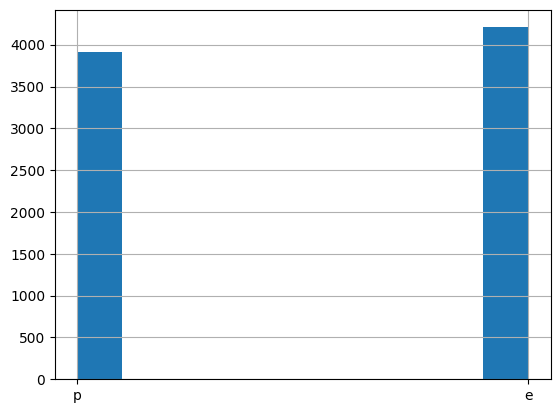

In [130]:
# Распределение по классам (p - ядовитый, e - съедобный)
mushroom_data['Class'].hist()

Видно, что их приблизительно равное количество

In [131]:
# Сколько пустых значений
mushroom_data.isna().sum()

Class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

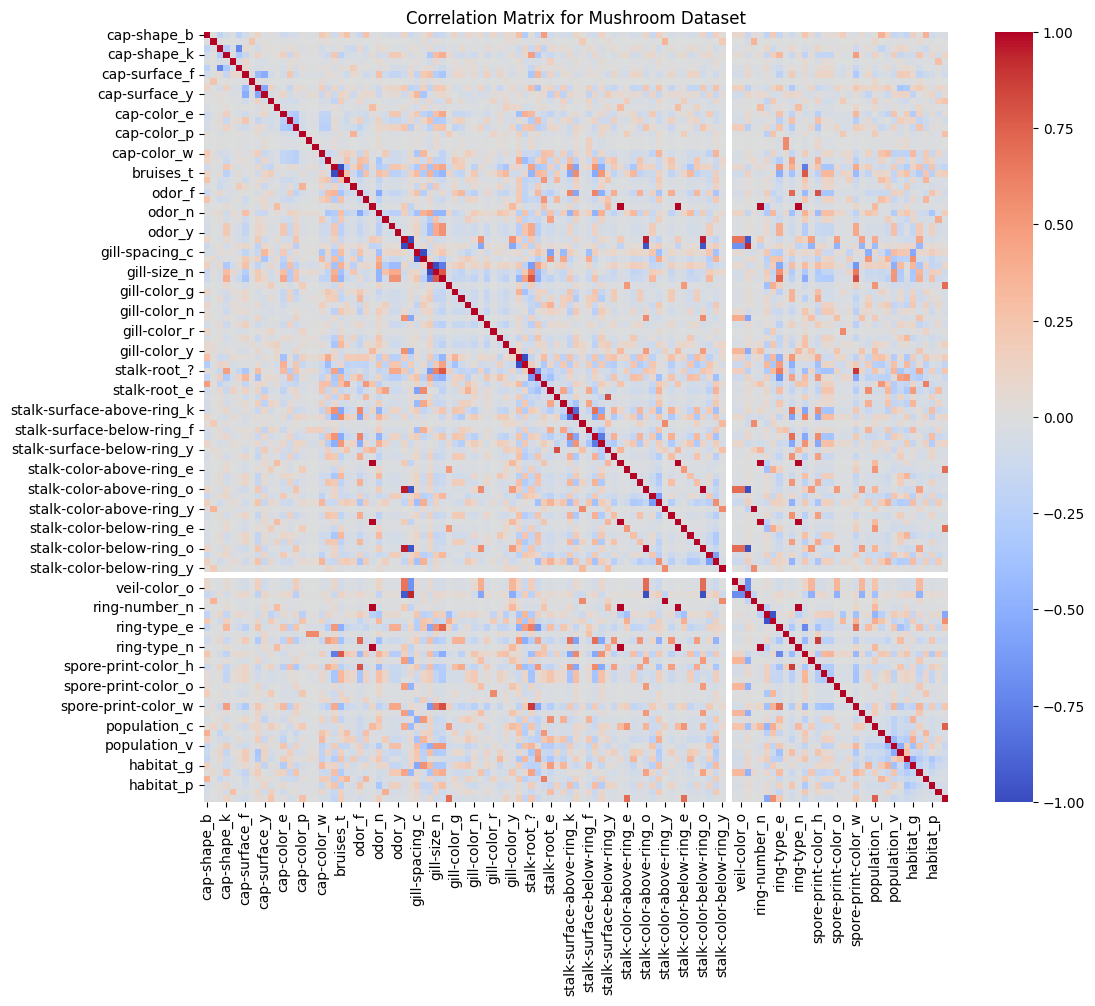

In [135]:
import warnings
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

warnings.filterwarnings('ignore')

# Инициализация категориальных фич
categorical_features = [
    'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]

# Извлечение категориальных данных
categorical_data = mushroom_data[categorical_features]

# Обработка NaN
categorical_data = categorical_data.fillna('Unknown')

# Применение One-Hot Encoding с использованием sparse_output=False
ohe_mushroom = OneHotEncoder(sparse_output=False)
encoded_data = ohe_mushroom.fit_transform(categorical_data)

# Создание DataFrame из закодированных данных
encoded_columns = ohe_mushroom.get_feature_names_out(categorical_features)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Итоговый датафрейм
final_data = pd.concat([encoded_df, mushroom_data['Class']], axis=1)

# Корреляционная матрица
corr_matrix = final_data.corr()

# Визуализация
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Mushroom Dataset')
plt.show()

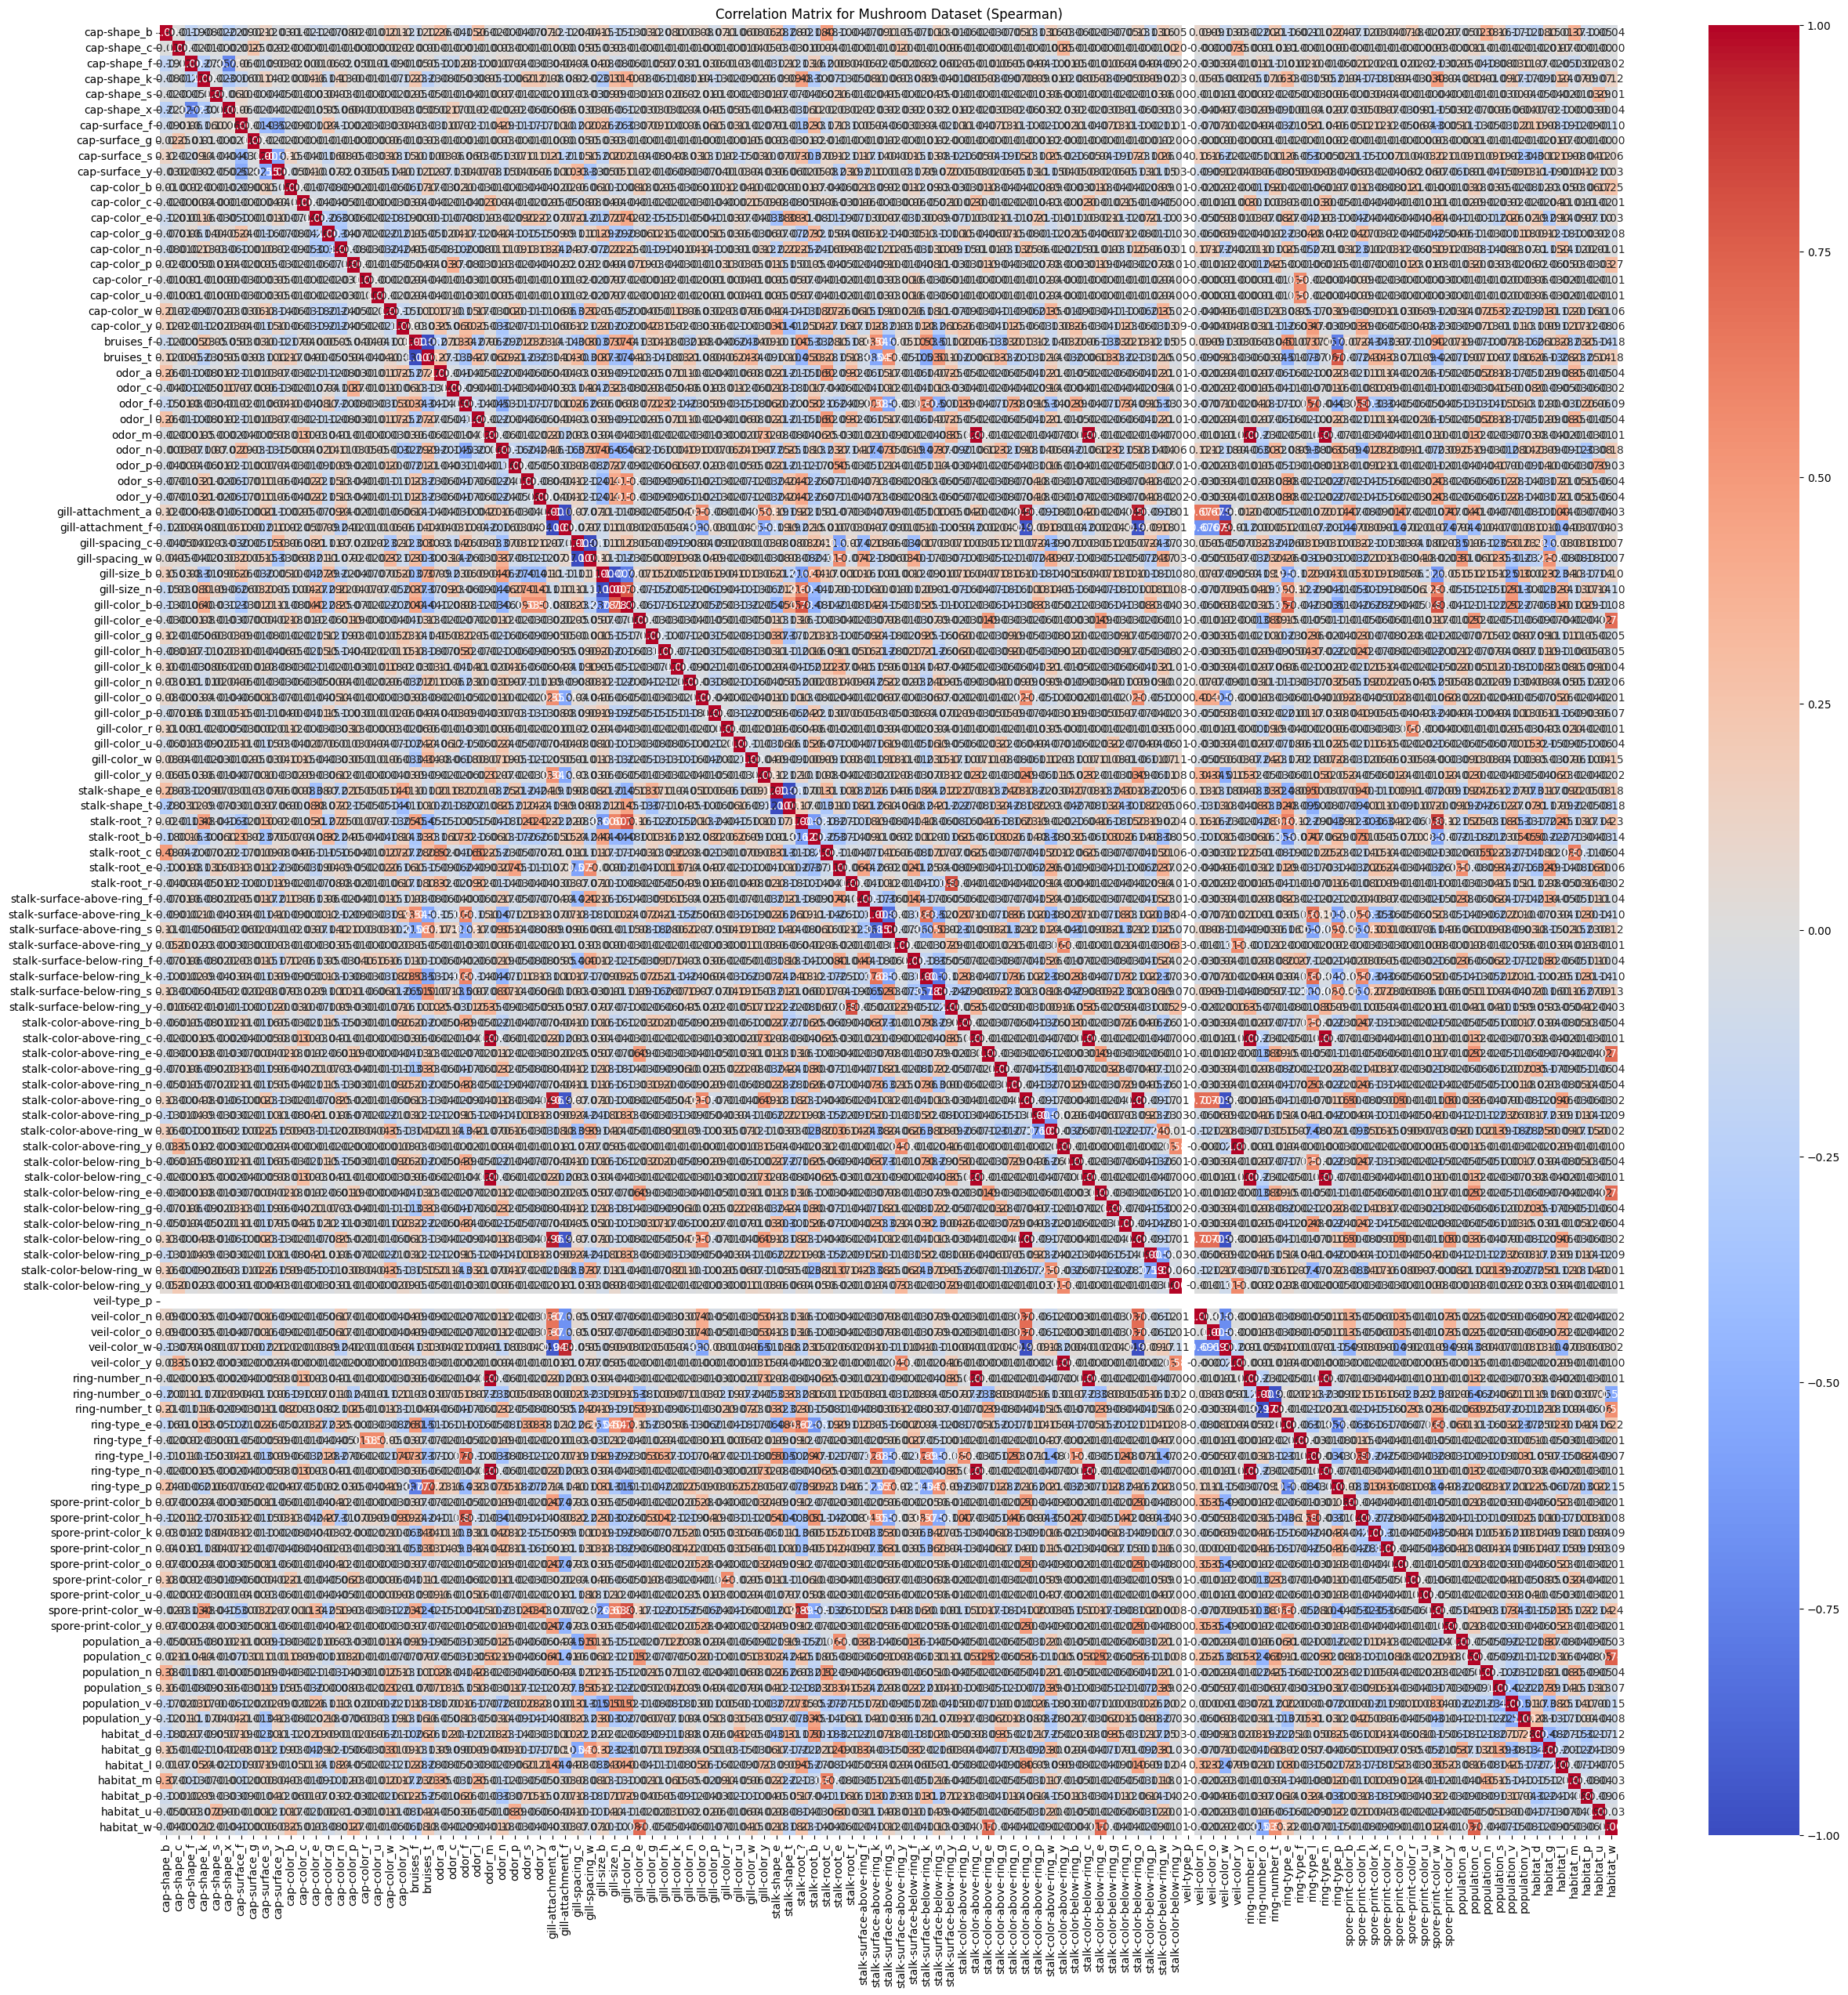

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# Рассчитываем корреляционную матрицу с помощью метода Спирмена
corr_matrix = final_data.corr(method='spearman')

# Визуализация корреляционной матрицы
plt.figure(figsize=(30, 30))  # Уменьшаем размер фигуры для улучшения видимости
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Mushroom Dataset (Spearman)")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split


# Целевая переменная - 'Class'
features = mushroom_data.drop(['Class'], axis=1)
target = mushroom_data['Class']

# Разбиение данных на обучающую и тестовую выборки
train_mushrooms_features, test_mushrooms_features, train_mushrooms_target, test_mushrooms_target = train_test_split(
    features, target, 
    test_size=0.1,   # 10% данных оставляем для теста
    shuffle=True,  # Перемешивание данных
    random_state=52,  # Для воспроизводимости
    stratify=target  # Сохранение пропорции классов
)

# Дополнительный вывод для проверки размеров выборок
print(f"Размер обучающей выборки: {train_mushrooms_features.shape}")
print(f"Размер тестовой выборки: {test_mushrooms_features.shape}")

Размер обучающей выборки: (7311, 22)
Размер тестовой выборки: (813, 22)


# EDA + Предобработка данных (Bike Sharing Dataset)

In [ ]:
bike_dataset = pd.read_csv('./bike.csv')
print(bike_dataset.head(0))

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [122]:
# Сколько пустых значений
bike_dataset.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<Axes: >

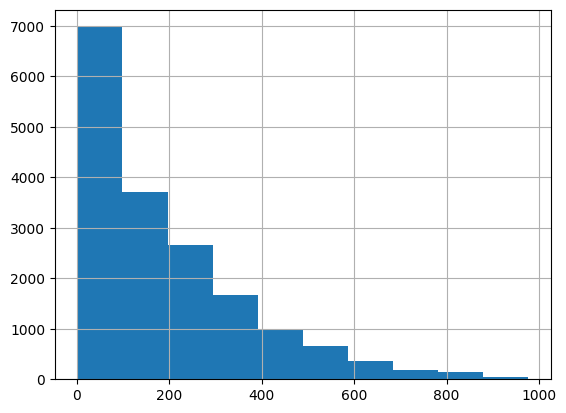

In [123]:
# Распредление по целевому столбцу
bike_dataset["cnt"].hist()

In [124]:
# Информация о целевом столбце
bike_dataset["cnt"].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 
            'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 
            'registered', 'day', 'month']
bike_categorical_features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
bike_numeric_features = ['temp', 'atemp', 'hum', 'windspeed']

bike_dataset.drop(["instant"], axis=1)

ohe_bike = OneHotEncoder(sparse_output=False, drop='first')
bike_categorical_data = bike_dataset[bike_categorical_features]
bike_encoded_data = ohe_bike.fit_transform(bike_categorical_data)
bike_encoded_columns = ohe_bike.get_feature_names_out(bike_categorical_features)
bike_encoded_df = pd.DataFrame(bike_encoded_data, columns=bike_encoded_columns)

scaler_bike = StandardScaler()
bike_numeric_data = bike_dataset[bike_numeric_features]
bike_scaled_data = scaler_bike.fit_transform(bike_numeric_data)
bike_scaled_df = pd.DataFrame(bike_scaled_data, columns=bike_numeric_features)

bike_data_final = pd.concat([bike_scaled_df, bike_encoded_df, bike_dataset['cnt']], axis=1)

print(f"Размер итогового датасета: {bike_data_final.shape}")

Размер итогового датасета: (17379, 54)


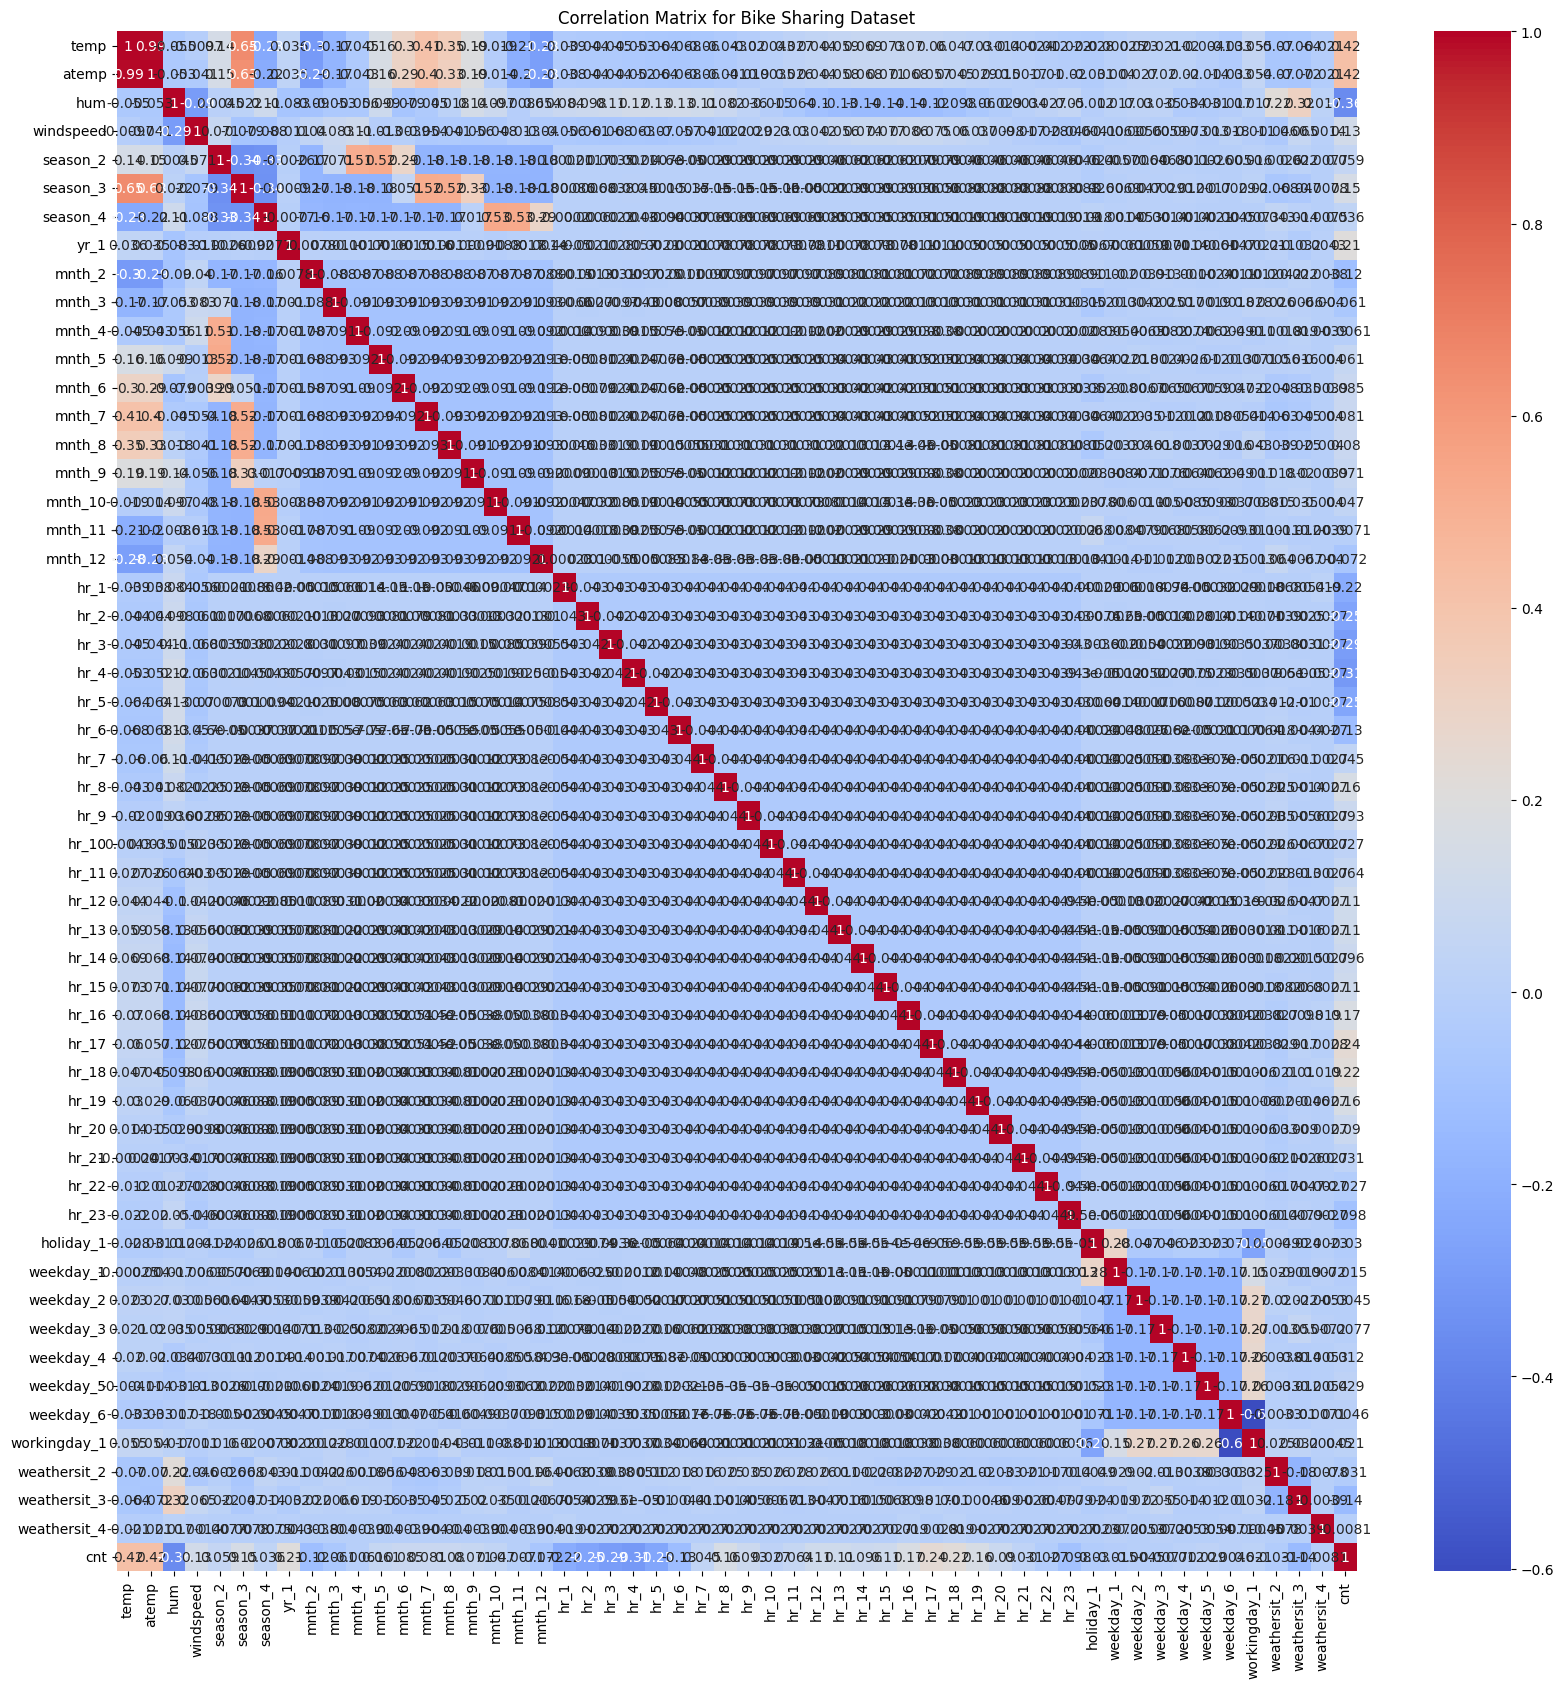

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация корреляционной матрицы с использованием метода Спирмена
plt.figure(figsize=(20, 20))  # Размер графика
sns.heatmap(bike_data_final.corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Bike Sharing Dataset")
plt.show()

In [172]:
from sklearn.model_selection import train_test_split

# Разделение данных на признаки и целевую переменную
X = bike_data_final.drop('cnt', axis=1)
y = bike_data_final['cnt']

# Разбиение на обучающую и тестовую выборки
train_bike_X, test_bike_X, train_bike_y, test_bike_y = train_test_split(
    X, y,
    test_size=0.1,  # 10% данных выделяем для тестовой выборки
    shuffle=True,   # Перемешивание данных перед разделением
    random_state=52 # Для воспроизводимости результатов
)

# Вывод размеров выборок для проверки
print(f"Размер обучающих данных: {train_bike_X.shape}, {train_bike_y.shape}")
print(f"Размер тестовых данных: {test_bike_X.shape}, {test_bike_y.shape}")

Размер обучающих данных: (15641, 53), (15641,)
Размер тестовых данных: (1738, 53), (1738,)


# 1. KNN

# Baseline для классификации 

In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder

categorical_features = train_mushrooms_features.columns

categorical_transformer = OneHotEncoder(sparse_output=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=2))
])

pipeline.fit(train_mushrooms_features, train_mushrooms_target)

y_pred_proba = pipeline.predict_proba(test_mushrooms_features)[:, 1]

roc_auc_value = roc_auc_score(test_mushrooms_target, y_pred_proba)
print(f"Sklearn KNN Baseline ROC_AUC metric is: {roc_auc_value}")

Sklearn KNN Baseline ROC_AUC metric is: 1.0


Вывод: стандартизация входных данных, а также подобранный гиперпараметр количества ближайших соседей улучшает качество бейзлайна

# Baseline для регрессии

In [129]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

numerical_transformer = StandardScaler()

pipeline = Pipeline(steps=[
    ('scaler', numerical_transformer),
    ('regressor', KNeighborsRegressor(n_neighbors=2))
])

pipeline.fit(train_bike_X, train_bike_y)

y_pred = pipeline.predict(test_bike_X)

mae_value = mean_absolute_error(test_bike_y, y_pred)
print(f"Sklearn KNN Baseline MAE metric is: {mae_value}")

Sklearn KNN Baseline MAE metric is: 49.11191024165708


# Улучшение регрессии


In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_absolute_error

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regressor', KNeighborsRegressor())
])

param_grid = {
    'regressor__n_neighbors': [2, 3, 5, 10],
    'regressor__metric': ['euclidean', 'manhattan']
}

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

grid_search = GridSearchCV(pipeline, param_grid, scoring=mae_scorer, cv=5)

grid_search.fit(train_bike_X, train_bike_y)

y_pred = grid_search.predict(test_bike_X)

mae_value = mean_absolute_error(test_bike_y, y_pred)
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшее значение MAE с этими параметрами: {mae_value}")

Лучшие параметры: {'regressor__metric': 'manhattan', 'regressor__n_neighbors': 3}
Лучшее значение MAE с этими параметрами: 45.93632527809743


Вывод: В классификации kNN оценивает класс на основе большинства классов ближайших соседей, что позволяет эффективно различать классы, когда данные имеют четко выраженные границы или кластеры. В регрессии, напротив, kNN может испытывать сложности с точностью предсказаний в присутствии шума или выбросов, так как средневзвешивание соседних значений делает его более чувствительным к отклонениям в данных.


# Своя имплементация

In [202]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin

class KNNRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, n_neighbors=5, metric="euclidean"):
        self.n_neighbors = n_neighbors
        self.metric = metric

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self
    
    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

    def predict(self, X):
        X_test = np.array(X)
        predictions = []

        for x in X_test:
            if self.metric == "euclidean":
                distances = np.linalg.norm(self.X_train - x, axis=1)
            elif self.metric == "manhattan":
                distances = np.sum(np.abs(self.X_train - x), axis=1)
            else:
                raise ValueError(f"Unsupported metric: {self.metric}")

            nearest_indices = np.argsort(distances)[:self.n_neighbors]
            nearest_values = self.y_train[nearest_indices]
            predictions.append(np.mean(nearest_values))

        return np.array(predictions)

class KNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self

    def predict(self, X):
        X_test = np.array(X)
        predictions = []

        for x in X_test:
            distances = np.linalg.norm(self.X_train - x, axis=1)

            nearest_indices = np.argsort(distances)[:self.n_neighbors]

            nearest_values = self.y_train[nearest_indices]
            predictions.append(np.bincount(nearest_values).argmax())

        return np.array(predictions)

# Baseline для собственной имплементации классификации

In [132]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
import numpy as np

train_mushrooms_target_numeric = train_mushrooms_target.map({'p': 1, 'e': 0})
test_mushrooms_target_numeric = test_mushrooms_target.map({'p': 1, 'e': 0})

categorical_features = train_mushrooms_features.columns.tolist()
categorical_transformer = OneHotEncoder(sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNNClassifier(n_neighbors=2))
])

pipeline.fit(train_mushrooms_features, train_mushrooms_target_numeric)

y_pred = pipeline.predict(test_mushrooms_features)

roc_auc = roc_auc_score(test_mushrooms_target_numeric, y_pred)
print(f"Custom KNN Baseline ROC_AUC metric is: {roc_auc}")

Custom KNN Baseline ROC_AUC metric is: 1.0


Выводы: Качество самописного классификатора совпадает с sklearn реализацией


# Baseline для собственной имплементации регрессии

In [133]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error


categorical_transformer = OneHotEncoder(sparse_output=False)
numerical_transformer = StandardScaler()

pipeline = Pipeline(steps=[
    ('scaler', numerical_transformer),  
    ('regressor', KNNRegressor(n_neighbors=2))
])


pipeline.fit(train_bike_X, train_bike_y)


y_pred = pipeline.predict(test_bike_X)


mae = mean_absolute_error(test_bike_y, y_pred)
print(f"Сustom KNN Baseline MAE metric is: {mae}")

Сustom KNN Baseline MAE metric is: 49.10270425776755


# Улучшение собственной имплементации регрессии

In [204]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, make_scorer


pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  
    ('regressor', KNNRegressor())  
])


param_grid = {
    'regressor__n_neighbors': [2, 3, 5, 10],  
    'regressor__metric': ['euclidean', 'manhattan']  
}


mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)


grid_search = GridSearchCV(pipeline, param_grid, scoring=mae_scorer, cv=5, n_jobs=-1)


grid_search.fit(train_bike_X, train_bike_y)


y_pred = grid_search.predict(test_bike_X)


mae_value = mean_absolute_error(test_bike_y, y_pred)


print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшее значение MAE с этими параметрами: {mae_value}")

Лучшие параметры: {'regressor__metric': 'manhattan', 'regressor__n_neighbors': 3}
Лучшее значение MAE с этими параметрами: 45.93632527809743


Выводы: собственные реализации классификации и регрессии справляются так же, как sklearn.

# 2. Линейные модели

# Baseline классификации

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score

train_mushrooms_target_numeric = train_mushrooms_target.map({'p': 1, 'e': 0})
test_mushrooms_target_numeric = test_mushrooms_target.map({'p': 1, 'e': 0})

categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_features)
        ]
    )),
    ('pca', PCA(n_components=10)), 
    ('classifier', LogisticRegression(max_iter=1000, penalty='l2', solver='liblinear'))
])

pipeline.fit(train_mushrooms_features, train_mushrooms_target_numeric)

y_pred = pipeline.predict(test_mushrooms_features)

roc_auc = roc_auc_score(test_mushrooms_target_numeric, y_pred)
print(f"Sklearn Logistic Regression with PCA ROC AUC metric is: {roc_auc}")

Sklearn Logistic Regression with PCA ROC AUC metric is: 0.9551359736293569


# Улучшение классификации

In [161]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
import numpy as np

train_mushrooms_target_numeric = train_mushrooms_target.map({'p': 1, 'e': 0})
test_mushrooms_target_numeric = test_mushrooms_target.map({'p': 1, 'e': 0})

# Определяем трансформаторы
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_features)
        ]
    )),
    ('poly', PolynomialFeatures()),
    ('pca', PCA()), 
    ('classifier', LogisticRegression(max_iter=1000, penalty='l2', solver='liblinear'))
])

param_grid = {
    'pca__n_components': [5, 10, 15], 
    'poly__degree': [1, 2], 
    'classifier__C': [0.1, 1.0, 10.0] 
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(train_mushrooms_features, train_mushrooms_target_numeric)

y_pred_proba = grid_search.predict_proba(test_mushrooms_features)[:, 1]

roc_auc = roc_auc_score(test_mushrooms_target_numeric, y_pred_proba)
print(f"Improved Logistic Regression with PCA and polynomial features ROC AUC metric is: {roc_auc}")
print(f"Best parameters: {grid_search.best_params_}")

Improved Logistic Regression with PCA and polynomial features ROC AUC metric is: 0.9967400261767414
Best parameters: {'classifier__C': 0.1, 'pca__n_components': 15, 'poly__degree': 2}


Выводы: получилось немного улучшить точность модели, добавляя новые признаки

# Baseline регрессии

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())  
])

pipeline.fit(train_bike_X, train_bike_y)

y_pred = pipeline.predict(test_bike_X)

mae = mean_absolute_error(test_bike_y, y_pred)
print(f"Sklearn Linear Regression baseline MAE metric is: {mae}")

Sklearn Linear Regression baseline MAE metric is: 74.6925240210247


# Улучшение регрессии

In [ ]:
# Создаем новый DataFrame для хранения расширенного набора признаков
train_bike_X_extended = train_bike_X.copy()

# Добавляем разницу температур
train_bike_X_extended['temp_diff'] = train_bike_X_extended['temp'] - train_bike_X_extended['atemp']

# Индекс дискомфорта
train_bike_X_extended['discomfort_index'] = train_bike_X_extended['temp'] * (1 + 0.1 * train_bike_X_extended['hum'])

# Пиковые часы
train_bike_X_extended['peak_hours'] = (
    train_bike_X_extended['hr_7'] + train_bike_X_extended['hr_8'] + train_bike_X_extended['hr_9'] +
    train_bike_X_extended['hr_17'] + train_bike_X_extended['hr_18'] + train_bike_X_extended['hr_19']
).astype(int)

# Сезон * рабочий день
train_bike_X_extended['season_workingday'] = (
    train_bike_X_extended['season_2'] + 
    train_bike_X_extended['season_3'] + 
    train_bike_X_extended['season_4']
) * train_bike_X_extended['workingday_1']

# Применяем те же преобразования к тестовому набору данных
test_bike_X_extended = test_bike_X.copy()
test_bike_X_extended['temp_diff'] = test_bike_X_extended['temp'] - test_bike_X_extended['atemp']
test_bike_X_extended['discomfort_index'] = test_bike_X_extended['temp'] * (1 + 0.1 * test_bike_X_extended['hum'])
test_bike_X_extended['peak_hours'] = (
    test_bike_X_extended['hr_7'] + test_bike_X_extended['hr_8'] + test_bike_X_extended['hr_9'] +
    test_bike_X_extended['hr_17'] + test_bike_X_extended['hr_18'] + test_bike_X_extended['hr_19']
).astype(int)
test_bike_X_extended['season_workingday'] = (
    test_bike_X_extended['season_2'] + 
    test_bike_X_extended['season_3'] + 
    test_bike_X_extended['season_4']
) * test_bike_X_extended['workingday_1']

# Обучение модели и оценка
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('regressor', LinearRegression())
])

param_grid = {
    'poly__degree': [1, 2]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

grid_search.fit(train_bike_X_extended, train_bike_y)

y_pred = grid_search.predict(test_bike_X_extended)

mae = mean_absolute_error(test_bike_y, y_pred)
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Improved Linear Regression MAE metric with new features is: {mae}")

Лучшие параметры: {'poly__degree': 1}
Improved Linear Regression MAE metric with new features is: 73.84612615088804


Выводы: получилось улучшить результат путем перебора гиперпараметров

# Своя имплементация

In [20]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class BaseCustomModel(BaseEstimator):
    def __init__(self, max_iter=5000, lr=0.04, tol=0.001, l1_coef=0.1):
        self.max_iter = max_iter
        self.lr = lr
        self.tol = tol
        self.l1_coef = l1_coef
        self.weights = None
        self.bias = None
        self.classes_ = None  # Добавляем атрибут classes_

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        self.classes_ = np.unique(y_train)  # Сохраняем уникальные классы
        y_train_reshaped = y_train.reshape(-1, 1)

        for _ in range(int(self.max_iter)):
            dJdw, dJdb = self._compute_gradients(X_train, y_train_reshaped)
            gradient_norm = np.linalg.norm(np.hstack([dJdw.flatten(), [dJdb]]))

            if gradient_norm < self.tol:
                break

            self.weights -= self.lr * dJdw
            self.bias -= self.lr * dJdb

        return self

    def _compute_gradients(self, X, y):
        y_hat = self.predict_proba(X).reshape(-1, 1)
        error = y_hat - y

        dJdw = X.T.dot(error) / len(y) + self.l1_coef * np.sign(self.weights)
        dJdb = np.mean(error)

        return dJdw, dJdb

    @staticmethod
    def _sigmoid(x):
        return 1 / (1 + np.exp(-x))



class CustomLogisticRegression(BaseCustomModel, ClassifierMixin):

    def predict(self, X):
        probabilities = self.predict_proba(X)
        return (probabilities > 0.5).astype(int).flatten()

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model).flatten()


class CustomLinearRegression(BaseCustomModel):

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        # Добавляем bias-терм в данные
        X_train = self._add_bias(X_train)
        self.weights = np.zeros((n_features + 1, 1))  # Увеличиваем размер на терм смещения
        self.bias = 0  # Отдельный bias теперь не нужен

        y_train_reshaped = y_train.to_numpy().reshape(-1, 1)

        for _ in range(int(self.max_iter)):
            dJdw = self._compute_gradients(X_train, y_train_reshaped)
            gradient_norm = np.linalg.norm(dJdw)

            if gradient_norm < self.tol:
                break

            self.weights -= self.lr * dJdw

        return self

    def predict(self, X):
        # Добавляем bias-терм также в данных для предсказания
        if X.shape[1] + 1 == self.weights.shape[0]:
            X = self._add_bias(X)
        # print(X.shape, self.weights.shape)
        return np.dot(X, self.weights)

    def _compute_gradients(self, X, y):
        y_hat = self.predict(X)
        error = y_hat - y

        # Используем L1-регуляризацию
        dJdw = (np.dot(X.T, error) + self.l1_coef * np.sign(self.weights)) / len(y)
        
        return dJdw

    def _add_bias(self, X):
        # Добавляем столбец из единиц для терма смещения
        return np.hstack([X, np.ones((X.shape[0], 1))])

    def predict_proba(self, X):
        linear_output = self.predict(X)
        probabilities = self._sigmoid(linear_output)
        return probabilities

# Baseline собственной классификации

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score

train_mushrooms_target_numeric = train_mushrooms_target.map({'p': 1, 'e': 0}).to_numpy()
test_mushrooms_target_numeric = test_mushrooms_target.map({'p': 1, 'e': 0}).to_numpy()

categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_features)
        ]
    )),
    ('pca', PCA(n_components=10)),
    ('classifier', CustomLogisticRegression(max_iter=1000, lr=0.04, tol=0.001, l1_coef=0.1))
])

pipeline.fit(train_mushrooms_features, train_mushrooms_target_numeric)

y_pred = pipeline.predict(test_mushrooms_features)

roc_auc = roc_auc_score(test_mushrooms_target_numeric, y_pred)

Custom Logistic Regression with PCA ROC AUC metric is: 0.8535344660429492


# Улучшение собственной классификации

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score

train_mushrooms_target_numeric = train_mushrooms_target.map({'p': 1, 'e': 0}).to_numpy()
test_mushrooms_target_numeric = test_mushrooms_target.map({'p': 1, 'e': 0}).to_numpy()

categorical_transformer = OneHotEncoder(sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CustomLogisticRegression(lr=0.01, l1_coef=0.05))
])

pipeline.fit(train_mushrooms_features, train_mushrooms_target_numeric)
y_pred = pipeline.predict(test_mushrooms_features)

print(f"Custom Linear Logistic Improved ROC_AUC metric is: {roc_auc_score(test_mushrooms_target_numeric, y_pred)}")

Custom Linear Logistic Improved ROC_AUC metric is: 0.9777437103107277


# Baseline собственной имплементации регрессии

In [181]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error

# Создаем pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regressor', CustomLinearRegression())  
])

# Обучаем конвейер на тренировочных данных
pipeline.fit(train_bike_X, train_bike_y)

# Прогнозируем на тестовых данных
y_pred = pipeline.predict(test_bike_X)

# Оцениваем качество предсказания с использованием метрики MAE
mae = mean_absolute_error(test_bike_y, y_pred)
print(f"Sklearn Linear Regression baseline MAE metric is: {mae}")

Sklearn Linear Regression baseline MAE metric is: 74.69270099858136


# Улучшение собственной имплементации регрессии

In [ ]:
train_bike_X_extended = train_bike_X.copy()

train_bike_X_extended['temp_diff'] = train_bike_X_extended['temp'] - train_bike_X_extended['atemp']

train_bike_X_extended['discomfort_index'] = train_bike_X_extended['temp'] * (1 + 0.1 * train_bike_X_extended['hum'])

train_bike_X_extended['peak_hours'] = (
    train_bike_X_extended['hr_7'] + train_bike_X_extended['hr_8'] + train_bike_X_extended['hr_9'] +
    train_bike_X_extended['hr_17'] + train_bike_X_extended['hr_18'] + train_bike_X_extended['hr_19']
).astype(int)

train_bike_X_extended['season_workingday'] = (
    train_bike_X_extended['season_2'] + 
    train_bike_X_extended['season_3'] + 
    train_bike_X_extended['season_4']
) * train_bike_X_extended['workingday_1']

test_bike_X_extended = test_bike_X.copy()
test_bike_X_extended['temp_diff'] = test_bike_X_extended['temp'] - test_bike_X_extended['atemp']
test_bike_X_extended['discomfort_index'] = test_bike_X_extended['temp'] * (1 + 0.1 * test_bike_X_extended['hum'])
test_bike_X_extended['peak_hours'] = (
    test_bike_X_extended['hr_7'] + test_bike_X_extended['hr_8'] + test_bike_X_extended['hr_9'] +
    test_bike_X_extended['hr_17'] + test_bike_X_extended['hr_18'] + test_bike_X_extended['hr_19']
).astype(int)
test_bike_X_extended['season_workingday'] = (
    test_bike_X_extended['season_2'] + 
    test_bike_X_extended['season_3'] + 
    test_bike_X_extended['season_4']
) * test_bike_X_extended['workingday_1']


pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', CustomLinearRegression())
])

pipeline.fit(train_bike_X_extended, train_bike_y)
y_pred = pipeline.predict(test_bike_X_extended)

print(f"Custom Linear improved MAE metric is: {mean_absolute_error(test_bike_y, y_pred)}")

Custom Linear improved MAE metric is: 73.95647607291161


Выводы: добавление новых признаков немного помогло в улучшении точности модели

Выводы: из-за меньшей гибкости самописная реализация отстает по качеству от встроенной

# 3. Decision Tree

# Baseline классификации

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score

train_mushrooms_target_numeric = train_mushrooms_target.map({'p': 1, 'e': 0})
test_mushrooms_target_numeric = test_mushrooms_target.map({'p': 1, 'e': 0})

categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_features)
        ]
    )),
    ('classifier', DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42))
])

pipeline.fit(train_mushrooms_features, train_mushrooms_target_numeric)

y_pred = pipeline.predict(test_mushrooms_features)

roc_auc = roc_auc_score(test_mushrooms_target_numeric, y_pred)
print(f"Decision Tree Regression with PCA ROC AUC metric is: {roc_auc}")

Decision Tree Regression with PCA ROC AUC metric is: 0.989311163895487


# Улучшение классификации

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

train_mushrooms_target_numeric = train_mushrooms_target.map({'p': 1, 'e': 0})
test_mushrooms_target_numeric = test_mushrooms_target.map({'p': 1, 'e': 0})

pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_features)
        ]
    )),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [3, 5, 7, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4, 8],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(train_mushrooms_features, train_mushrooms_target_numeric)

best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(test_mushrooms_features)

roc_auc = roc_auc_score(test_mushrooms_target_numeric, y_pred)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Improved Decision Tree Classifier ROC AUC metric with best hyperparameters is: {roc_auc}")

Лучшие параметры: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Improved Decision Tree Classifier ROC AUC metric with best hyperparameters is: 1.0


Выводы: перебор гиперпараметров дал отличный результат

# Baseline регрессии

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=42))  
])

pipeline.fit(train_bike_X, train_bike_y)

y_pred = pipeline.predict(test_bike_X)

mae = mean_absolute_error(test_bike_y, y_pred)
print(f"Decision Tree baseline MAE metric is: {mae}")

Decision Tree baseline MAE metric is: 102.69086847773819


# Улучшение регрессии

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import numpy as np

pipeline = Pipeline(steps=[
    ('classifier', DecisionTreeRegressor(criterion='absolute_error', random_state=42))
])

param_grid = {
    'classifier__max_depth': [4, 6, 8, 10, 12],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 5, 10],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

grid_search.fit(train_bike_X_extended, train_bike_y)

best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(test_bike_X_extended)

mae = mean_absolute_error(test_bike_y, y_pred)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Improved Decision Tree MAE metric with best hyperparameters is: {mae}")

Лучшие параметры: {'classifier__max_depth': 12, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10}
Improved Decision Tree MAE metric with best hyperparameters is: 48.811565017261216


Выводы: получилось достичь лучшего качества, чем на линейной модели, потому что деревья могут учитывать нелинейные зависимости в данных

# Собственная имплементация дерева решений

In [75]:
class CustomDecisionTreeClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, classes=2, max_depth=None, max_features=None, min_samples_split=2):
        self.max_depth = max_depth
        self.max_features = max_features
        self.min_samples_split = min_samples_split 
        self.classes_ = classes
        self._node = {
            'left': None,
            'right': None,
            'feature': None,
            'threshold': None,
            'depth': 0,
            'classes_proba': None
        }
        self.tree = None  
        self.classes = None  

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.tree = {'root': self._node.copy()} 
        self._build_tree(self.tree['root'], X, y)  
        return self

    def predict_proba(self, X):
        proba_preds = []
        for x in X:
            preds_for_x = self._get_predict(self.tree['root'], x)  
            proba_preds.append(preds_for_x)
        return np.array(proba_preds)

    def predict(self, X):
        proba_preds = self.predict_proba(X)
        preds = proba_preds.argmax(axis=1).reshape(-1, 1)
        return preds

    def get_best_split(self, X, y):
        best_j = None
        best_t = None
        best_left_ids = None
        best_right_ids = None
        best_Q = float('-inf')

        for i in range(X.shape[1]):
            unique_features = np.unique(X[:, i])
            for j in range(len(unique_features) - 1):
                cur_threshold = (unique_features[j] + unique_features[j + 1]) / 2
                left_indexes = X[:, i] < cur_threshold
                left_children_y = y[left_indexes]
                right_children_y = y[~left_indexes]

                if len(left_children_y) < self.min_samples_split or len(right_children_y) < self.min_samples_split:
                    continue

                cur_Q = self.calc_Q(y, left_children_y, right_children_y)
                if cur_Q > best_Q:
                    best_Q = cur_Q
                    best_j = i
                    best_t = cur_threshold
                    best_left_ids = left_indexes
                    best_right_ids = ~left_indexes

        return best_j, best_t, best_left_ids, best_right_ids

    def calc_Q(self, y, y_left, y_right):
        Q = self.gini(y) - ((len(y_left) / len(y)) * self.gini(y_left) + (len(y_right) / len(y)) * self.gini(y_right))
        return Q

    def gini(self, y):
        H = 0
        for label in self.classes:
            prob = (y == label).sum() / len(y)
            H += prob * (1 - prob)
        return H

    def _build_tree(self, curr_node, X, y):
        if curr_node['depth'] == self.max_depth:
            curr_node['classes_proba'] = {c: (y == c).mean() for c in self.classes}
            return

        if len(y) < self.min_samples_split:
            curr_node['classes_proba'] = {c: (y == c).mean() for c in self.classes}
            return

        if len(np.unique(y)) == 1:
            curr_node['classes_proba'] = {c: (y == c).mean() for c in self.classes}
            return

        j, t, left_ids, right_ids = self.get_best_split(X, y)

        if j is None or t is None:
            curr_node['classes_proba'] = {c: (y == c).mean() for c in self.classes}
            return

        curr_node['feature'] = j
        curr_node['threshold'] = t

        left = self._node.copy()
        right = self._node.copy()
        left['depth'] = curr_node['depth'] + 1
        right['depth'] = curr_node['depth'] + 1

        curr_node['left'] = left
        curr_node['right'] = right

        self._build_tree(left, X[left_ids], y[left_ids])
        self._build_tree(right, X[right_ids], y[right_ids])

    def _get_predict(self, node, x):
        if node['threshold'] is None: 
            return [node['classes_proba'][c] for c in self.classes]

        if x[node['feature']] <= node['threshold']:
            return self._get_predict(node['left'], x)
        else:
            return self._get_predict(node['right'], x)





    
class CustomDecisionTreeRegressor(BaseEstimator):
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self._node = {
            'left': None,
            'right': None,
            'feature': None,
            'threshold': None,
            'depth': 0,
            'value': None 
        }
        self.tree = None 

    def fit(self, X, y):
        self.tree = {'root': self._node.copy()} 
        self._build_tree(self.tree['root'], X, y) 
        return self

    def predict(self, X):
        predictions = []
        for x in X:
            pred = self._get_prediction(self.tree['root'], x) 
            predictions.append(pred)
        return np.array(predictions)

    def get_best_split(self, X, y):
        best_feature = None
        best_threshold = None
        best_left_ids = None
        best_right_ids = None
        best_impurity = float('inf')

        for i in range(X.shape[1]):
            unique_values = np.unique(X[:, i])
            for j in range(len(unique_values) - 1):
                threshold = (unique_values[j] + unique_values[j + 1]) / 2
                left_ids = X[:, i] < threshold
                right_ids = ~left_ids

                if len(y[left_ids]) < self.min_samples_split or len(y[right_ids]) < self.min_samples_split:
                    continue

                impurity = self.calc_impurity(y, y[left_ids], y[right_ids])
                if impurity < best_impurity:
                    best_impurity = impurity
                    best_feature = i
                    best_threshold = threshold
                    best_left_ids = left_ids
                    best_right_ids = right_ids

        return best_feature, best_threshold, best_left_ids, best_right_ids

    def calc_impurity(self, y, y_left, y_right):
        def variance(data):
            return np.var(data) * len(data)

        left_impurity = variance(y_left)
        right_impurity = variance(y_right)
        total_impurity = (left_impurity + right_impurity) / len(y)
        return total_impurity

    def _build_tree(self, curr_node, X, y):
        if curr_node['depth'] == self.max_depth or len(y) < self.min_samples_split:
            curr_node['value'] = np.mean(y) 
            return

        if np.var(y) == 0: 
            curr_node['value'] = np.mean(y)
            return

        feature, threshold, left_ids, right_ids = self.get_best_split(X, y)

        if feature is None:  
            curr_node['value'] = np.mean(y)
            return

        curr_node['feature'] = feature
        curr_node['threshold'] = threshold

        left = self._node.copy()
        right = self._node.copy()
        left['depth'] = curr_node['depth'] + 1
        right['depth'] = curr_node['depth'] + 1

        curr_node['left'] = left
        curr_node['right'] = right

        self._build_tree(left, X[left_ids], y[left_ids])
        self._build_tree(right, X[right_ids], y[right_ids])

    def _get_prediction(self, node, x):
        if node['threshold'] is None: 
            return node['value']

        if x[node['feature']] <= node['threshold']:
            return self._get_prediction(node['left'], x)
        else:
            return self._get_prediction(node['right'], x)


# Baseline собственной имплементации классификации

In [ ]:
categorical_transformer = OneHotEncoder(sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CustomDecisionTreeClassifier(max_depth=3))
])

pipeline.fit(train_mushrooms_features, train_mushrooms_target_numeric)
y_pred = pipeline.predict(test_mushrooms_features)

print(f"Custom DecisionTreeClassifier baseline ROC_AUC metric is: {roc_auc_score(test_mushrooms_target_numeric, y_pred)}")

Custom DecisionTreeClassifier baseline ROC_AUC metric is: 0.989311163895487


# Улучшение собственной классификации

In [ ]:
categorical_transformer = OneHotEncoder(sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CustomDecisionTreeClassifier(max_depth=8))
])

pipeline.fit(train_mushrooms_features, train_mushrooms_target_numeric)
y_pred = pipeline.predict(test_mushrooms_features)

print(f"Custom DecisionTreeClassifier Improved ROC_AUC metric is: {roc_auc_score(test_mushrooms_target_numeric, y_pred)}")

Custom DecisionTreeClassifier Improved ROC_AUC metric is: 1.0


Выводы: увеличив максимальную глубину для дерева удалось улучшить результат

# Baseline собственной имплементации регрессии

In [200]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regressor', CustomDecisionTreeRegressor(max_depth=3)),
])

pipeline.fit(train_bike_X, train_bike_y)

y_pred = pipeline.predict(test_bike_X)

mae = mean_absolute_error(test_bike_y, y_pred)
print(f"Decision Tree baseline MAE metric is: {mae}")

Decision Tree baseline MAE metric is: 114.40148555570059


# Улучшение собственной имплементации регрессии

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regressor', CustomDecisionTreeRegressor(max_depth=50, min_samples_split=10)),
])

pipeline.fit(train_bike_X_extended, train_bike_y)

y_pred = pipeline.predict(test_bike_X_extended)

mae = mean_absolute_error(test_bike_y, y_pred)
print(f"Decision Tree baseline MAE metric is: {mae}")

Decision Tree baseline MAE metric is: 45.08951074942818


Выводы: самописная реализация с подобранными гиперпараметрами смогла обойти модель из sklearn

# 4. Random Forest

# Baseline классификации

In [92]:
from sklearn.ensemble import RandomForestClassifier
categorical_transformer = OneHotEncoder(sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=5))
])

pipeline.fit(train_mushrooms_features, train_mushrooms_target_numeric)
y_pred = pipeline.predict(test_mushrooms_features)

print(f"Sklearn RandomForest baseline ROC_AUC metric is: {roc_auc_score(test_mushrooms_target_numeric, y_pred)}")

Sklearn RandomForest baseline ROC_AUC metric is: 0.9910714285714286


# Улучшение классификации

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

categorical_transformer = OneHotEncoder(sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [5, 10, 15, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(train_mushrooms_features, train_mushrooms_target_numeric)

best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(test_mushrooms_features)

roc_auc = roc_auc_score(test_mushrooms_target_numeric, y_pred)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Improved Sklearn RandomForest ROC AUC metric with best hyperparameters is: {roc_auc}")

Лучшие параметры: {'classifier__max_depth': 5, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 150}
Improved Sklearn RandomForest ROC AUC metric with best hyperparameters is: 0.9910714285714286


# Baseline регрессии

In [160]:
from sklearn.ensemble import RandomForestRegressor

categorical_transformer = OneHotEncoder(sparse_output=False)
numerical_transformer = StandardScaler()


pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=5))
])

pipeline.fit(train_bike_X, train_bike_y)
y_pred = pipeline.predict(test_bike_X)

print(f"Sklearn RandomForest baseline MAE metric is: {mean_absolute_error(test_bike_y, y_pred)}")

Sklearn RandomForest baseline MAE metric is: 65.0099995395238


# Улучшение регрессии

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

param_grid = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [5, 10, 15, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

grid_search.fit(train_bike_X_extended, train_bike_y)

best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(test_bike_X_extended)

mae = mean_absolute_error(test_bike_y, y_pred)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Improved Sklearn RandomForest MAE metric with best hyperparameters is: {mae}")

Лучшие параметры: {'regressor__max_depth': None, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 150}
Improved Sklearn RandomForest MAE metric with best hyperparameters is: 38.5291036312492


Выводы: RandomForest отлично справился с задачей регрессии, задача классификации получилась чуть хуже, чем у дерева решений

# Своя имплементация

In [120]:
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin

class CustomRandomForestClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=10, max_depth=None, min_samples_split=2, max_features=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.random_state = random_state
        self.trees = []
        self.feature_indices = []

    def fit(self, X, y):
        y = y.to_numpy().reshape(-1, 1)
        np.random.seed(self.random_state)
        self.trees = []
        self.feature_indices = []

        n_samples, n_features = X.shape

        for _ in range(self.n_estimators):
            sample_indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample = X[sample_indices]
            y_sample = y[sample_indices]

            if self.max_features is None:
                max_features = n_features
            else:
                max_features = min(n_features, self.max_features)
            feature_indices = np.random.choice(n_features, max_features, replace=False)
            self.feature_indices.append(feature_indices)

            tree = CustomDecisionTreeClassifier(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_sample[:, feature_indices], y_sample)
            self.trees.append(tree)

        return self

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.trees)))
        for i, tree in enumerate(self.trees):
            predictions[:, i] = tree.predict(X[:, self.feature_indices[i]]).flatten()

        final_predictions = np.apply_along_axis(lambda x: np.bincount(x.astype(int)).argmax(), axis=1, arr=predictions)
        return final_predictions

    def predict_proba(self, X):
        predictions = np.zeros((X.shape[0], len(self.trees), len(np.unique(self.trees[0].classes))))
        for i, tree in enumerate(self.trees):
            predictions[:, i, :] = tree.predict_proba(X[:, self.feature_indices[i]])
        return np.mean(predictions, axis=1)

class CustomRandomForestRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, n_estimators=10, max_depth=None, min_samples_split=2, max_features=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.random_state = random_state
        self.trees = []
        self.feature_indices = []
    
    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

    def fit(self, X, y):
        y = y.to_numpy().reshape(-1, 1)
        np.random.seed(self.random_state)
        self.trees = []
        self.feature_indices = []

        n_samples, n_features = X.shape

        for _ in range(self.n_estimators):
            sample_indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample = X[sample_indices]
            y_sample = y[sample_indices]

            if self.max_features is None:
                max_features = n_features
            else:
                max_features = min(n_features, self.max_features)
            feature_indices = np.random.choice(n_features, max_features, replace=False)
            self.feature_indices.append(feature_indices)

            tree = CustomDecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_sample[:, feature_indices], y_sample)
            self.trees.append(tree)

        return self

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.trees)))
        for i, tree in enumerate(self.trees):
            predictions[:, i] = tree.predict(X[:, self.feature_indices[i]])
        return np.mean(predictions, axis=1)


# Baseline собственной классификации

In [106]:
categorical_transformer = OneHotEncoder(sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CustomRandomForestClassifier(n_estimators=100, max_depth=5))
])

pipeline.fit(train_mushrooms_features, train_mushrooms_target)
y_pred = pipeline.predict(test_mushrooms_features)

print(f"Custom RandomForest baseline ROC_AUC metric is: {roc_auc_score(test_mushrooms_target, y_pred)}")

Custom RandomForest baseline ROC_AUC metric is: 1.0


# Baseline собственной имплементации регрессии

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', CustomRandomForestRegressor(n_estimators=100, max_depth=10))
])

pipeline.fit(train_bike_X, train_bike_y)

y_pred = pipeline.predict(test_bike_X)

mae = mean_absolute_error(test_bike_y, y_pred)
print(f"Random Forest baseline MAE metric is: {mae}")

Random Forest baseline MAE metric is: 65.28211477540647


# Улучшение собственной имплементации регрессии

In [152]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', CustomRandomForestRegressor(n_estimators=150, max_depth=10, min_samples_split=2))
])

pipeline.fit(train_bike_X, train_bike_y)

y_pred = pipeline.predict(test_bike_X)

mae = mean_absolute_error(test_bike_y, y_pred)
print(f"Random Forest baseline MAE metric is: {mae}")

Random Forest baseline MAE metric is: 64.95258675798834


Выводы: собственная реализация при тех же параметрах выдает более плохой результат, чем у sklearn.

# 5. Gradient Boosting

# Baseline классификации

In [199]:
from sklearn.ensemble import GradientBoostingClassifier
categorical_transformer = OneHotEncoder(sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_leaf_nodes=10, max_depth=2))
])

pipeline.fit(train_mushrooms_features, train_mushrooms_target_numeric)
y_pred = pipeline.predict(test_mushrooms_features)

print(f"Sklearn Boosting baseline ROC_AUC metric: {roc_auc_score(test_mushrooms_target_numeric, y_pred)}")

Sklearn Boosting baseline ROC_AUC metric: 1.0


# Baseline регрессии

In [174]:
from sklearn.ensemble import GradientBoostingRegressor

categorical_transformer = OneHotEncoder(sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, bike_categorical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('classifier', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3))
])

pipeline.fit(train_bike_X, train_bike_y)
y_pred = pipeline.predict(test_bike_X)

print(f"Sklearn Boosting baseline MAE metric is: {mean_absolute_error(test_bike_y, y_pred)}")

Sklearn Boosting baseline MAE metric is: 57.542984175088016


# Улучшение регрессии

In [180]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error


categorical_transformer = OneHotEncoder(sparse_output=False)
numerical_transformer = StandardScaler()

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingRegressor())
])

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')

grid_search.fit(train_bike_X, train_bike_y)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая оценка MAE: {-grid_search.best_score_}")

best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(test_bike_X)
print(f"Sklearn Improved Boosting baseline MAE metric: {mean_absolute_error(test_bike_y, y_pred)}")

Лучшие параметры: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Лучшая оценка MAE: 32.64470197502175
Sklearn Improved Boosting baseline MAE metric: 31.799657509646234


# Своя имплементация

In [189]:
class CustomGradientBoostingRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2, random_state=None):
        self.n_estimators = n_estimators 
        self.learning_rate = learning_rate 
        self.max_depth = max_depth 
        self.min_samples_split = min_samples_split 
        self.random_state = random_state 
        self.trees = [] 

    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.trees = []

        y_pred = np.full(y.shape, np.mean(y))

        for _ in range(self.n_estimators):
            residuals = y - y_pred

            tree = CustomDecisionTreeRegressor(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split
            )
            tree.fit(X, residuals)
            self.trees.append(tree)

            y_pred += self.learning_rate * tree.predict(X)

        return self
    
    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])

        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)

        return y_pred

class CustomGradientBoostingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2, random_state=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.random_state = random_state
        self.trees = [] 
        self.classes = None
    
    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.trees = []

        self.classes = np.unique(y)
        y_onehot = np.eye(len(self.classes))[y]

        y_pred = np.full(y_onehot.shape, np.mean(y_onehot, axis=0))

        for _ in range(self.n_estimators):
            residuals = y_onehot - self._softmax(y_pred)

            class_trees = []
            for c in range(len(self.classes)):
                tree = CustomDecisionTreeRegressor(
                    max_depth=self.max_depth,
                    min_samples_split=self.min_samples_split
                )
                tree.fit(X, residuals[:, c])
                class_trees.append(tree)

            self.trees.append(class_trees)

            for c, tree in enumerate(class_trees):
                y_pred[:, c] += self.learning_rate * tree.predict(X)

        return self

    def predict_proba(self, X):
        y_pred = np.zeros((X.shape[0], len(self.classes)))

        for class_trees in self.trees:
            for c, tree in enumerate(class_trees):
                y_pred[:, c] += self.learning_rate * tree.predict(X)

        return self._softmax(y_pred)

    def predict(self, X):
        proba = self.predict_proba(X)
        return np.argmax(proba, axis=1)

    @staticmethod
    def _softmax(logits):
        exps = np.exp(logits - np.max(logits, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)


# Baseline собственной классификации

In [195]:
from sklearn.ensemble import GradientBoostingClassifier
categorical_transformer = OneHotEncoder(sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CustomGradientBoostingClassifier(n_estimators=300, learning_rate=0.1,  max_depth=2))
])

pipeline.fit(train_mushrooms_features, train_mushrooms_target_numeric)
y_pred = pipeline.predict(test_mushrooms_features)

print(f"Sklearn Boosting baseline ROC_AUC metric: {roc_auc_score(test_mushrooms_target_numeric, y_pred)}")

Sklearn Boosting baseline ROC_AUC metric: 1.0


# Baseline собственной имплементации регрессии

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', CustomGradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3))
])

pipeline.fit(train_bike_X, train_bike_y)

y_pred = pipeline.predict(test_bike_X)

mae = mean_absolute_error(test_bike_y, y_pred)
print(f"Custom Boosting baseline MAE metric: {mae}")

Custom Boosting baseline MAE metric: 191.51526629684523


# Улучшение собственной имплементации регрессии

In [206]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error


pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', CustomGradientBoostingRegressor())
])

param_grid = {
    'classifier__n_estimators': [50, 100, 150, 200],
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__max_depth': [2, 3, 4, 5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

grid_search.fit(train_bike_X, train_bike_y)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая оценка MAE: {-grid_search.best_score_}")

best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(test_bike_X)
mae = mean_absolute_error(test_bike_y, y_pred)
print(f"Custom Boosting baseline MAE metric: {mae}")

Лучшие параметры: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}
Лучшая оценка MAE: 189.7009466354428
Custom Boosting baseline MAE metric: 191.00409152841627


Выводы: собственная реализация градиентного бустинга хорошо себя показала для задачи классификации. В задаче регрессии она сильно уступает sklearn

### Таблица 1 Метрика качества на тестовом наборе данных

| **Алгоритм**          | **Задача**        | **Бейзлайн** | **Улучшенный бейзлайн** | **Самостоятельная имплементация алгоритма** |
|------------------------|-------------------|-------------|-------------------------|---------------------------------------------|
| **KNN**               | классификация     |    1.0         |         1.0                |           1.0                                  |
|                        | регрессия        |      49.1119       |         45.936                |              45.936                               |
| **Линейные модели**    | классификация     |     0.955        |         0.9967                |              0.9777                               |
|                        | регрессия        |     74.692        |         73.846                |              73.956                               |
| **Decision Tree**    | классификация     |    0.989         |       1.0                  |               1.0                              |
|                        | регрессия        |     102.69        |       48.81                  |              45.09                              |
| **Random Forest**      | классификация     |    0.991         |       0.991                  |              1.0                               |
|                        | регрессия        |     65.01        |        38.529                 |               64.952                              |
| **Gradient Boosting**| классификация     |    1.0        |       1.0                  |             1.0                              |
|                        | регрессия        |     57.543        |       31.80                  |              191.004                               |
